<a href="https://colab.research.google.com/github/TAUforPython/fuzzy/blob/main/exampleFuzzyNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

example Fuzzy Neutral Network

Источник в статье:
https://ieeexplore.ieee.org/abstract/document/9776208

In [1]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=6ae98ce5cb8d492539bf1d44b3a6e11f66ed712df5303f9cdd661b161fdc0352
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
!pip install anfis
!pip install matplotlib-venn

In [3]:
import numpy
import skfuzzy

In [4]:
pip install sanfis

In [5]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.3952, 0.6485, 0.9428],
        [0.9223, 0.0171, 0.5472],
        [0.0908, 0.4201, 0.8143],
        [0.7243, 0.1833, 0.4615],
        [0.8898, 0.3520, 0.7073]])


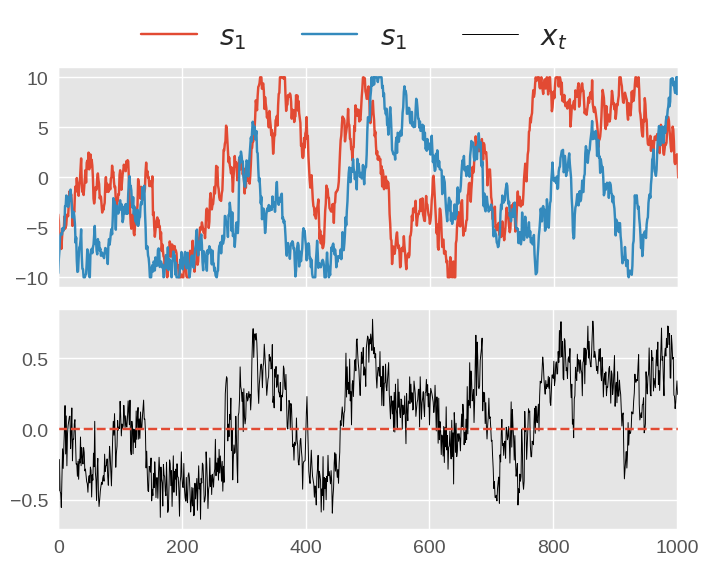

Membership functions (DGP):


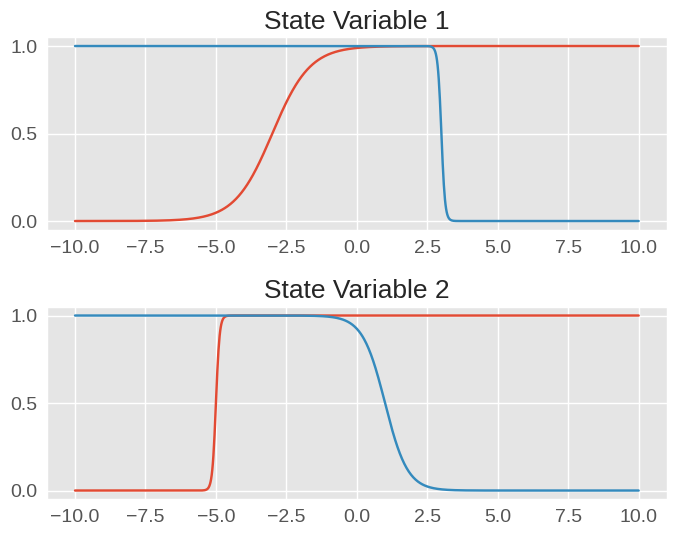

In [6]:
# Load modules
import numpy as np
import torch
from sanfis import SANFIS, plottingtools
from sanfis.datagenerators import sanfis_generator

# seed for reproducibility
np.random.seed(3)
torch.manual_seed(3)
## Generate Data ##
## First let's generate some data!
## The given example is an AR(2)-process whoose AR-parameters depend on the regime of two independent state variables:
S, S_train, S_valid, X, X_train, X_valid, y, y_train, y_valid, = sanfis_generator.gen_data_ts(
    n_obs=1000, test_size=0.3, plot_dgp=True)

In [7]:
# list of membership functions
membfuncs = [
    {'function': 'sigmoid',
     'n_memb': 2,
     'params': {'c': {'value': [0.0, 0.0],
                      'trainable': True},
                'gamma': {'value': [-2.5, 2.5],
                          'trainable': True}}},

    {'function': 'sigmoid',
     'n_memb': 2,
     'params': {'c': {'value': [0.0, 0.0],
                      'trainable': True},
                'gamma': {'value': [-2.5, 2.5],
                          'trainable': True}}}
]

Train s-anfis on 700 samples, validate on 300 samples


Training Loop: 100%|##########| 100.0/100 [00:11<00:00,  8.50epochs/s, train_loss=0.137, valid_loss=0.135]


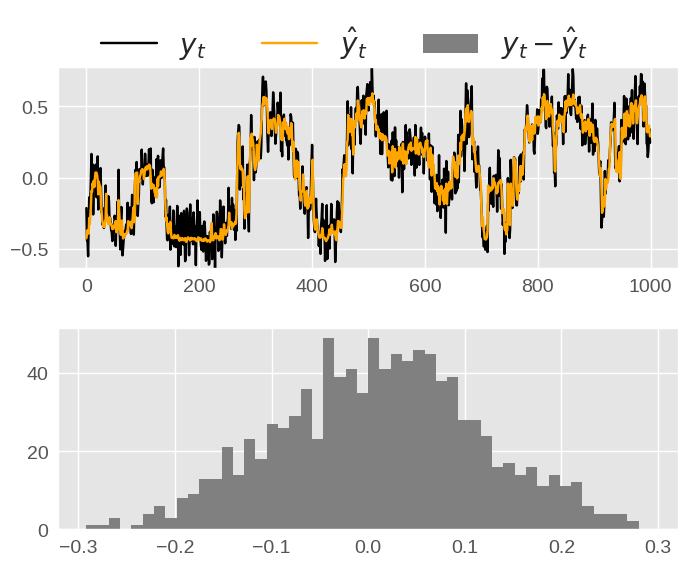

In [8]:
# make model / set loss function and optimizer
fis = SANFIS(membfuncs=membfuncs, n_input=2, scale='Std')
loss_function = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(fis.parameters(), lr=0.05)

# fit model
history = fis.fit([S_train, X_train, y_train], [S_valid, X_valid, y_valid],
                  optimizer, loss_function, epochs=100)
# eval model
y_pred = fis.predict([S, X])
plottingtools.plt_prediction(y, y_pred)


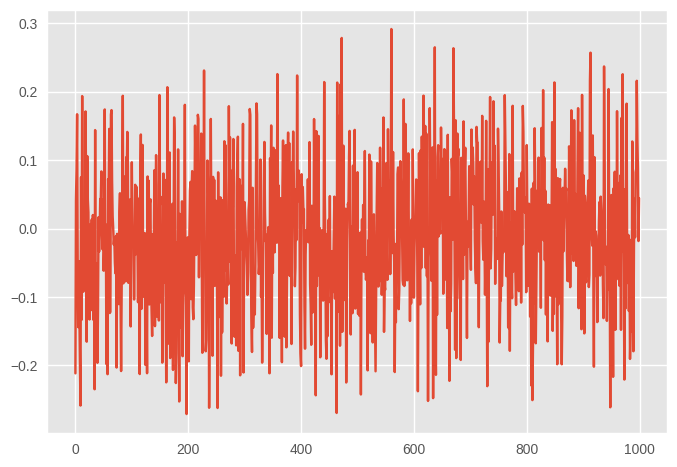

In [9]:
import matplotlib.pyplot as plt
plt.plot(y_pred-y)